# Calculating the Radius from transit depth

You Belong With Me
****

Importing Modules

In [1]:
import astropy.constants as const
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
%matplotlib notebook

In [3]:
def ScreamExtractor(File):
    FILENAME = pd.read_csv(f'{File}.csv', sep=',')
    return FILENAME

In [11]:
Number = '471' # 99 or 471
PlanetData = ScreamExtractor(f'{Number} Exoplanets')
StarData = ScreamExtractor(f'{Number} Gaia Results')

In [12]:
Source = StarData['source_id']
SourceID = []
for t in Source:
    SourceID.append(f'Gaia DR2 {t}')

In [13]:
OrbitalPeriod = PlanetData['pl_orbper'] #Days
TransitDepth = PlanetData['pl_trandep'] #%
StellarRadius = StarData['radius_val'] #Solar Radius
PlanetRadius = []
for n in range(len(TransitDepth)):
    StarIndex = SourceID.index(PlanetData['gaia_id'][n])
    PlanetRadius.append(np.sqrt(TransitDepth[n]/100)*StellarRadius[StarIndex]*const.R_sun/const.R_earth)

In [14]:
len(OrbitalPeriod)

471

<IPython.core.display.Javascript object>


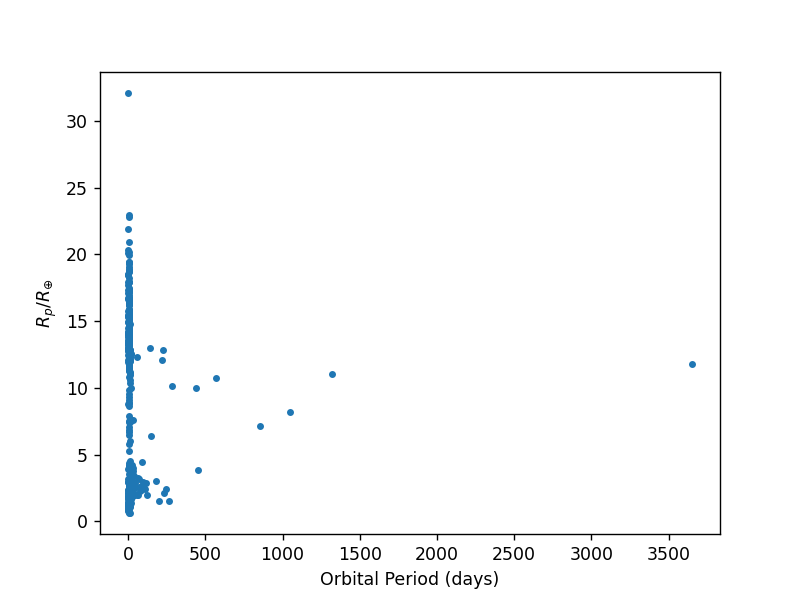

In [15]:
plt.figure()
plt.plot(OrbitalPeriod, PlanetRadius, '.')
plt.xlabel('Orbital Period (days)')
plt.ylabel(r'$R_p/R_{\oplus}$')
'''plt.xlim(0, 30)
plt.ylim(0, 20)'''
plt.show()

<IPython.core.display.Javascript object>


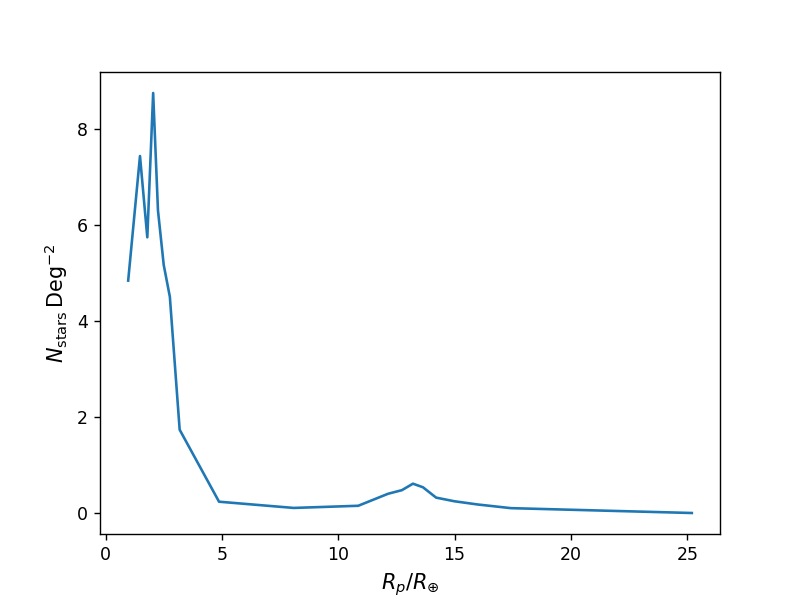

In [24]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))

def DensityProfile(Dimension):
    List = []
    for s in range(len(Dimension)):
        if str(Dimension[s]) != 'nan':
            List.append(float(Dimension[s]))

    Bins = round(np.sqrt(len(List))) # square root of n.

    nums, bin_edges, binnumber = stats.binned_statistic(List, List, 'count', 
                                                        bins = histedges_equalN(List, Bins))

    bin_width = (bin_edges[1:] - bin_edges[:-1])

    x = bin_width/2 + bin_edges[:-1]
    Area = np.pi*(bin_edges[1:]**2 - bin_edges[:-1]**2)
    y = nums/Area
    yerr = np.sqrt(nums)
    return x, y

x, y = DensityProfile(PlanetRadius) # PlanetRadius or OrbitalPeriod

# Density Profile Graph.
fig5, ax = plt.subplots()
plt.plot(x, y)
plt.xlabel(r'$R_p/R_{\oplus}$', fontsize = 12)
plt.ylabel(r'$N_{\rm stars}\,{\rm Deg}^{-2}$', fontsize = 12)
plt.tick_params(axis='y', which='minor')
plt.tick_params(axis='x', which='minor')

You tatty git